In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import Input

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 30 # 30일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

# 이후 10일 데이터 예측
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n-test_num+1)])
y = np.array([df['value'].values[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

# plt.plot(df['value'].values[:100])
# plt.plot(X[0], color='orange')
# plt.plot(range(30, 30+test_num), y[0], color='green')
# plt.xticks([10*i for i in range(11)])
# plt.grid(True)

X = X.reshape((-1, 30, 1))
y = y.reshape((-1, 10, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()

Mounted at /content/drive


# Model 1 - GRU(unit 200) 1층, <30 to 10>

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [ ]:
model1 = Sequential()
model1.add(Input(batch_shape=(None, n, 1)))
model1.add(GRU(200, return_sequences=True))
model1.add(TimeDistributed(Dense(1)))
model1.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 200)           121800    
                                                                 
 time_distributed (TimeDist  (None, 30, 1)             201       
 ributed)                                                        
                                                                 
 lambda (Lambda)             (None, 10, 1)             0         
                                                                 
Total params: 122001 (476.57 KB)
Trainable params: 122001 (476.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train,
                      epochs=30,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/30
519/519 [==============================] - 12s 7ms/step - loss: 8220.4551 - mae: 70.9193 - val_loss: 3732.3813 - val_mae: 43.1430
Epoch 2/30
519/519 [==============================] - 4s 7ms/step - loss: 2351.7112 - mae: 30.8769 - val_loss: 1443.3734 - val_mae: 23.3805
Epoch 3/30
519/519 [==============================] - 4s 8ms/step - loss: 1124.6124 - mae: 20.9396 - val_loss: 853.6134 - val_mae: 18.9045
Epoch 4/30
519/519 [==============================] - 3s 5ms/step - loss: 787.1703 - mae: 18.1289 - val_loss: 682.2305 - val_mae: 16.7938
Epoch 5/30
519/519 [==============================] - 3s 6ms/step - loss: 654.2291 - mae: 16.7861 - val_loss: 657.4118 - val_mae: 16.8797
Epoch 6/30
519/519 [==============================] - 3s 6ms/step - loss: 609.3738 - mae: 16.3788 - val_loss: 605.7130 - val_mae: 16.3730
Epoch 7/30
519/519 [==============================] - 4s 7ms/step - loss: 576.5896 - mae: 16.0784 - val_loss: 566.4935 - val_mae: 15.6152
Epoch 8/30
519/519 [========

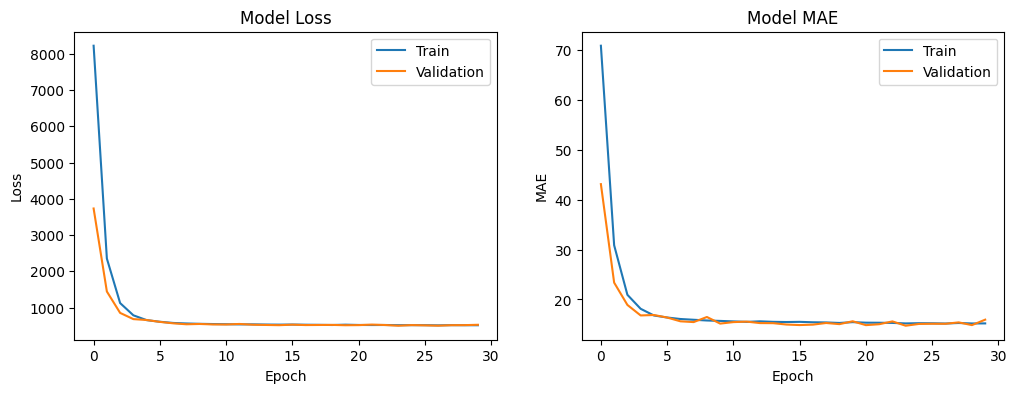

In [ ]:
plot_result(history1)

In [ ]:
pred1 = model1.predict(X_test)

163/163 [==============================] - 1s 2ms/step


In [ ]:
model1.evaluate(X_test, y_test)

163/163 [==============================] - 1s 3ms/step - loss: 529.0012 - mae: 16.0955


[529.0011596679688, 16.095458984375]

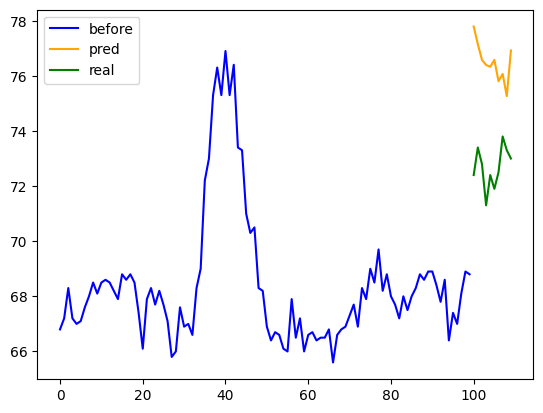

In [ ]:
left_num = 100

i = 7

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred1[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [ ]:
# model1.save('/content/drive/My Drive/ai_project/model/seq2seq_1.keras')

# Model 2 - GRU(unit 200) 2층, <30 to 10>

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [ ]:
model2 = Sequential()
model2.add(Input(batch_shape=(None, n, 1)))
model2.add(GRU(200, return_sequences=True))
model2.add(GRU(200, return_sequences=True))
model2.add(TimeDistributed(Dense(1)))
model2.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 30, 200)           121800    
                                                                 
 gru_6 (GRU)                 (None, 30, 200)           241200    
                                                                 
 time_distributed_3 (TimeDi  (None, 30, 1)             201       
 stributed)                                                      
                                                                 
 lambda_3 (Lambda)           (None, 10, 1)             0         
                                                                 
Total params: 363201 (1.39 MB)
Trainable params: 363201 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train, y_train,
                      epochs=20,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/20
519/519 [==============================] - 13s 13ms/step - loss: 7715.6738 - mae: 68.2005 - val_loss: 3729.3210 - val_mae: 43.9106
Epoch 2/20
519/519 [==============================] - 6s 12ms/step - loss: 2554.7434 - mae: 34.0251 - val_loss: 1550.9431 - val_mae: 26.8935
Epoch 3/20
519/519 [==============================] - 7s 13ms/step - loss: 1130.5077 - mae: 20.8301 - val_loss: 843.7983 - val_mae: 18.3439
Epoch 4/20
519/519 [==============================] - 4s 7ms/step - loss: 751.0438 - mae: 17.5070 - val_loss: 631.9202 - val_mae: 16.0720
Epoch 5/20
519/519 [==============================] - 4s 8ms/step - loss: 623.6011 - mae: 16.3429 - val_loss: 569.9487 - val_mae: 16.3765
Epoch 6/20
519/519 [==============================] - 5s 10ms/step - loss: 575.3173 - mae: 16.0043 - val_loss: 548.6829 - val_mae: 15.6596
Epoch 7/20
519/519 [==============================] - 4s 8ms/step - loss: 558.2765 - mae: 15.7772 - val_loss: 541.5710 - val_mae: 16.2548
Epoch 8/20
519/519 [====

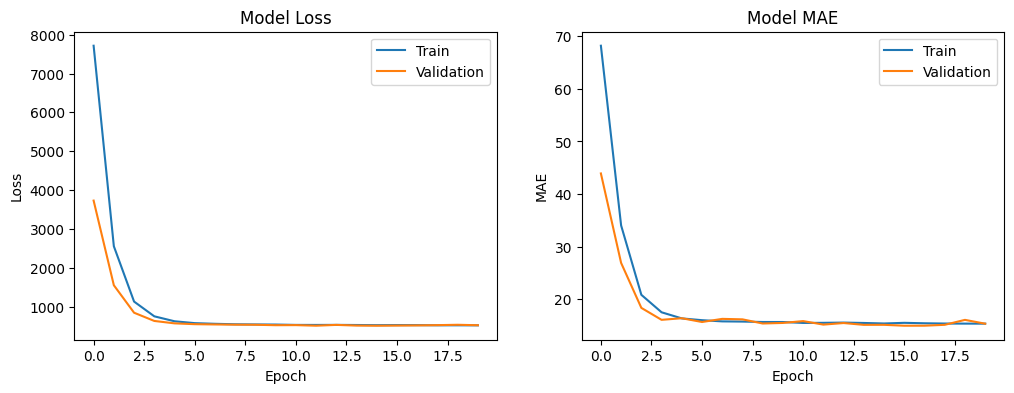

In [ ]:
plot_result(history2)

In [ ]:
pred2 = model2.predict(X_test)

163/163 [==============================] - 1s 3ms/step


In [ ]:
model2.evaluate(X_test, y_test)

163/163 [==============================] - 1s 4ms/step - loss: 516.8658 - mae: 15.3838


[516.8658447265625, 15.38378620147705]

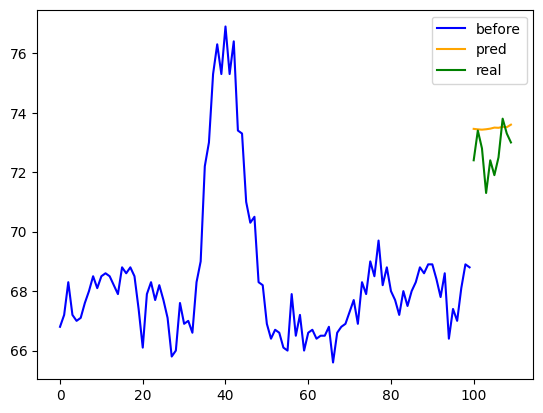

In [ ]:
left_num = 100

i = 7

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred2[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [ ]:
# model2.save('/content/drive/My Drive/ai_project/model/seq2seq_1-2.keras')

# Model 3 - GRU(unit 200) 1층, <50 to 10>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import Input

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 50 # 30일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

# 이후 10일 데이터 예측
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n-test_num+1)])
y = np.array([df['value'].values[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

# plt.plot(df['value'].values[:100])
# plt.plot(X[0], color='orange')
# plt.plot(range(30, 30+test_num), y[0], color='green')
# plt.xticks([10*i for i in range(11)])
# plt.grid(True)

X = X.reshape((-1, n, 1))
y = y.reshape((-1, test_num, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [ ]:
model3 = Sequential()
model3.add(Input(batch_shape=(None, n, 1)))
model3.add(GRU(200, return_sequences=True))
model3.add(GRU(200, return_sequences=True))
model3.add(TimeDistributed(Dense(1)))
model3.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 50, 200)           121800    
                                                                 
 gru_10 (GRU)                (None, 50, 200)           241200    
                                                                 
 time_distributed_5 (TimeDi  (None, 50, 1)             201       
 stributed)                                                      
                                                                 
 lambda_5 (Lambda)           (None, 10, 1)             0         
                                                                 
Total params: 363201 (1.39 MB)
Trainable params: 363201 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history3 = model3.fit(X_train, y_train,
                      epochs=20,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/20
519/519 [==============================] - 13s 18ms/step - loss: 7503.2300 - mae: 66.9508 - val_loss: 3542.7627 - val_mae: 43.2757
Epoch 2/20
519/519 [==============================] - 6s 11ms/step - loss: 2787.7634 - mae: 38.2080 - val_loss: 1582.3345 - val_mae: 25.1615
Epoch 3/20
519/519 [==============================] - 9s 17ms/step - loss: 1219.0769 - mae: 21.7369 - val_loss: 840.7632 - val_mae: 18.8869
Epoch 4/20
519/519 [==============================] - 5s 9ms/step - loss: 791.5308 - mae: 18.2189 - val_loss: 648.9108 - val_mae: 16.6439
Epoch 5/20
519/519 [==============================] - 4s 8ms/step - loss: 668.9825 - mae: 17.2088 - val_loss: 587.5748 - val_mae: 16.4422
Epoch 6/20
519/519 [==============================] - 5s 10ms/step - loss: 615.8015 - mae: 16.6909 - val_loss: 579.0307 - val_mae: 17.5132
Epoch 7/20
519/519 [==============================] - 5s 9ms/step - loss: 590.0294 - mae: 16.4286 - val_loss: 537.2320 - val_mae: 15.7090
Epoch 8/20
519/519 [====

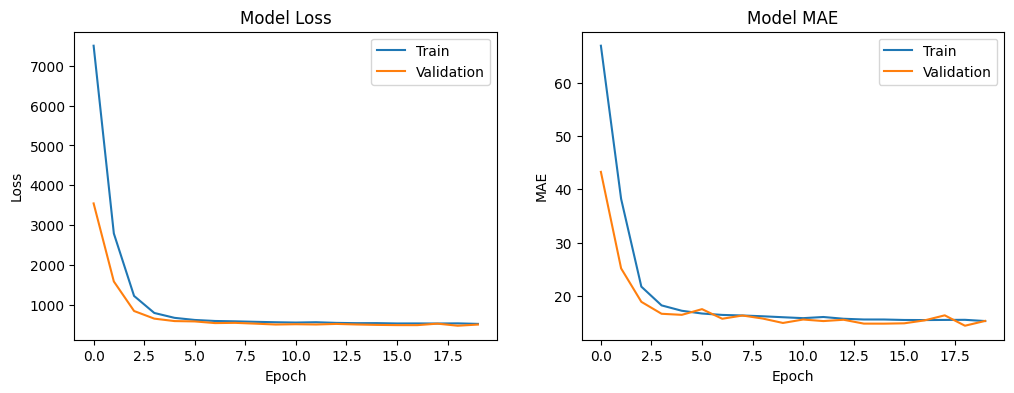

In [ ]:
plot_result(history3)

In [ ]:
pred3 = model3.predict(X_test)

162/162 [==============================] - 2s 5ms/step


In [ ]:
model3.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 534.2118 - mae: 15.7350


[534.2117919921875, 15.734967231750488]

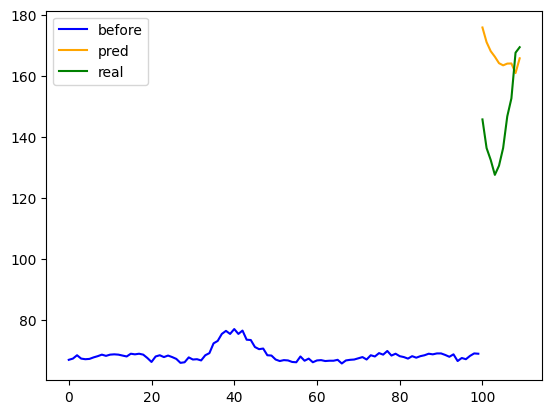

In [ ]:
left_num = 100

i = 5

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred3[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [ ]:
model3.save('/content/drive/My Drive/ai_project/model/seq2seq_1-3.keras')

# Model 4 - GRU(unit 200) 1층, <100 to 10>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import Input

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 100 # 100일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

# 이후 10일 데이터 예측
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n-test_num+1)])
y = np.array([df['value'].values[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

# plt.plot(df['value'].values[:100])
# plt.plot(X[0], color='orange')
# plt.plot(range(30, 30+test_num), y[0], color='green')
# plt.xticks([10*i for i in range(11)])
# plt.grid(True)

X = X.reshape((-1, n, 1))
y = y.reshape((-1, test_num, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [ ]:
model4 = Sequential()
model4.add(Input(batch_shape=(None, n, 1)))
model4.add(GRU(200, return_sequences=True))
model4.add(GRU(200, return_sequences=True))
model4.add(TimeDistributed(Dense(1)))
model4.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model4.compile(loss='mse', optimizer='adam', metrics=['mae'])

model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 100, 200)          121800    
                                                                 
 gru_12 (GRU)                (None, 100, 200)          241200    
                                                                 
 time_distributed_6 (TimeDi  (None, 100, 1)            201       
 stributed)                                                      
                                                                 
 lambda_6 (Lambda)           (None, 10, 1)             0         
                                                                 
Total params: 363201 (1.39 MB)
Trainable params: 363201 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history4 = model4.fit(X_train, y_train,
                      epochs=20,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/20
518/518 [==============================] - 16s 25ms/step - loss: 7583.3203 - mae: 67.5760 - val_loss: 3533.6072 - val_mae: 43.0542
Epoch 2/20
518/518 [==============================] - 8s 16ms/step - loss: 2470.3765 - mae: 33.5039 - val_loss: 1394.3387 - val_mae: 23.5362
Epoch 3/20
518/518 [==============================] - 7s 13ms/step - loss: 1154.5889 - mae: 21.8231 - val_loss: 852.9070 - val_mae: 19.7354
Epoch 4/20
518/518 [==============================] - 6s 12ms/step - loss: 789.0214 - mae: 18.5243 - val_loss: 680.3191 - val_mae: 17.9884
Epoch 5/20
518/518 [==============================] - 7s 14ms/step - loss: 666.7412 - mae: 17.3110 - val_loss: 589.3901 - val_mae: 16.1900
Epoch 6/20
518/518 [==============================] - 7s 13ms/step - loss: 622.0430 - mae: 16.9042 - val_loss: 599.8807 - val_mae: 16.1339
Epoch 7/20
518/518 [==============================] - 7s 14ms/step - loss: 598.0186 - mae: 16.6370 - val_loss: 593.2036 - val_mae: 16.8405
Epoch 8/20
518/518 [=

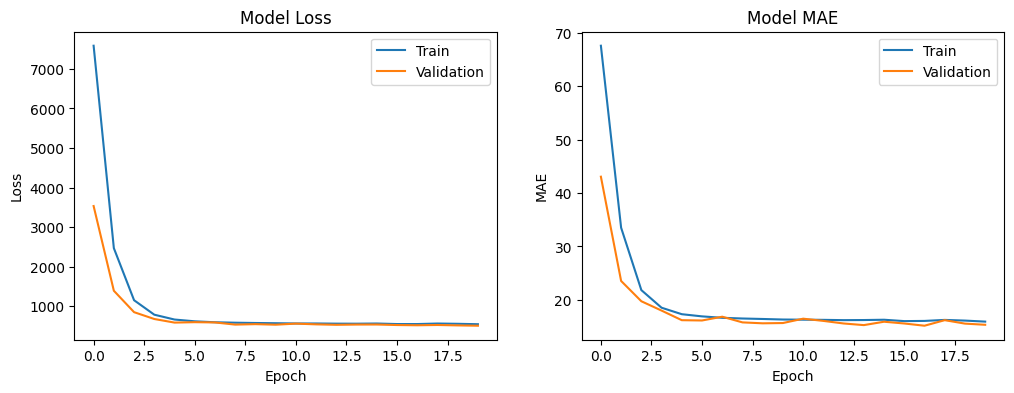

In [ ]:
plot_result(history4)

In [ ]:
pred4 = model4.predict(X_test)

162/162 [==============================] - 2s 5ms/step


In [ ]:
model4.evaluate(X_test, y_test)

162/162 [==============================] - 1s 6ms/step - loss: 543.3219 - mae: 15.7169


[543.3218994140625, 15.716870307922363]

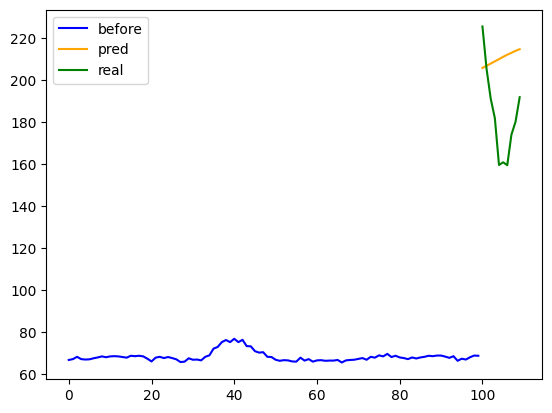

In [ ]:
left_num = 100

i = 5

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred4[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [ ]:
# model4.save('/content/drive/My Drive/ai_project/model/seq2seq_1-4.keras')

# Model 5 - GRU(unit 200) 1층, <20 to 10>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import Input

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 20 # 20일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

# 이후 10일 데이터 예측
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n-test_num+1)])
y = np.array([df['value'].values[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

# plt.plot(df['value'].values[:100])
# plt.plot(X[0], color='orange')
# plt.plot(range(30, 30+test_num), y[0], color='green')
# plt.xticks([10*i for i in range(11)])
# plt.grid(True)

X = X.reshape((-1, n, 1))
y = y.reshape((-1, test_num, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [ ]:
model5 = Sequential()
model5.add(Input(batch_shape=(None, n, 1)))
model5.add(GRU(200, return_sequences=True))
model5.add(GRU(200, return_sequences=True))
model5.add(TimeDistributed(Dense(1)))
model5.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model5.compile(loss='mse', optimizer='adam', metrics=['mae'])

model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 20, 200)           121800    
                                                                 
 gru_14 (GRU)                (None, 20, 200)           241200    
                                                                 
 time_distributed_7 (TimeDi  (None, 20, 1)             201       
 stributed)                                                      
                                                                 
 lambda_7 (Lambda)           (None, 10, 1)             0         
                                                                 
Total params: 363201 (1.39 MB)
Trainable params: 363201 (1.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history5 = model5.fit(X_train, y_train,
                      epochs=20,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/20
519/519 [==============================] - 10s 12ms/step - loss: 7454.4038 - mae: 66.5633 - val_loss: 3652.5920 - val_mae: 43.7395
Epoch 2/20
519/519 [==============================] - 6s 12ms/step - loss: 2982.3984 - mae: 41.4190 - val_loss: 1911.0551 - val_mae: 27.3841
Epoch 3/20
519/519 [==============================] - 6s 12ms/step - loss: 1350.4950 - mae: 22.9843 - val_loss: 943.4092 - val_mae: 19.1208
Epoch 4/20
519/519 [==============================] - 5s 10ms/step - loss: 824.4614 - mae: 18.4044 - val_loss: 708.1569 - val_mae: 17.5483
Epoch 5/20
519/519 [==============================] - 5s 9ms/step - loss: 671.2167 - mae: 17.0525 - val_loss: 632.0553 - val_mae: 17.1283
Epoch 6/20
519/519 [==============================] - 4s 8ms/step - loss: 616.4809 - mae: 16.5122 - val_loss: 611.1496 - val_mae: 16.0588
Epoch 7/20
519/519 [==============================] - 3s 7ms/step - loss: 590.9311 - mae: 16.2457 - val_loss: 629.6138 - val_mae: 15.8967
Epoch 8/20
519/519 [====

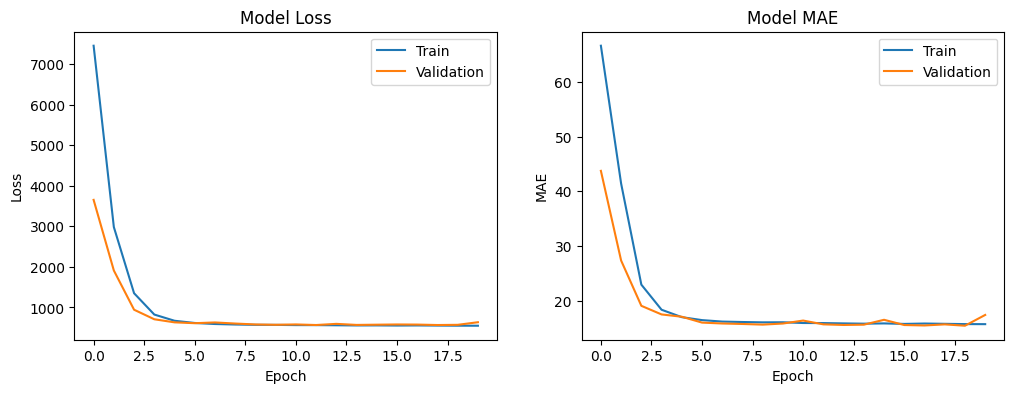

In [ ]:
plot_result(history5)

In [ ]:
pred5 = model5.predict(X_test)

163/163 [==============================] - 1s 3ms/step


In [ ]:
model5.evaluate(X_test, y_test)

163/163 [==============================] - 1s 4ms/step - loss: 605.6464 - mae: 17.1926


[605.6463623046875, 17.192584991455078]

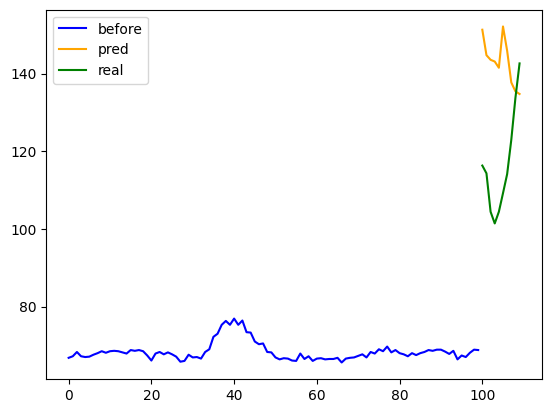

In [ ]:
left_num = 100

i = 5

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred5[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [ ]:
model5.save('/content/drive/My Drive/ai_project/model/seq2seq_1-5.keras')


# Model 6 - GRU(unit 200) 1층, <30 to 10>, MinMaxScaler

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import Input

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 30 # 30일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

temp_data = df['value'].values

scaler = MinMaxScaler()
temp_data_scaled = scaler.fit_transform(temp_data.reshape(-1, 1))[:, 0]

# 이후 10일 데이터 예측
X_scaled = np.array([temp_data_scaled[i:i+n] for i in range(len(df)-n-test_num+1)])
y_scaled = np.array([temp_data_scaled[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

# plt.plot(df['value'].values[:100])
# plt.plot(X[0], color='orange')
# plt.plot(range(30, 30+test_num), y[0], color='green')
# plt.xticks([10*i for i in range(11)])
# plt.grid(True)

X_scaled = X_scaled.reshape((-1, n, 1))
y_scaled = y_scaled.reshape((-1, 10, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(np.array(X_scaled), np.array(y_scaled), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((20752, 30, 1), (5188, 30, 1), (20752, 10, 1), (5188, 10, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [ ]:
model6 = Sequential()
model6.add(Input(batch_shape=(None, n, 1)))
model6.add(GRU(200, return_sequences=True))
model6.add(TimeDistributed(Dense(1)))
model6.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model6.compile(loss='mse', optimizer='adam', metrics=['mae'])

model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 30, 200)           121800    
                                                                 
 time_distributed_11 (TimeD  (None, 30, 1)             201       
 istributed)                                                     
                                                                 
 lambda_11 (Lambda)          (None, 10, 1)             0         
                                                                 
Total params: 122001 (476.57 KB)
Trainable params: 122001 (476.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history6 = model6.fit(X_train_scaled, y_train_scaled,
                      epochs=60,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/60
519/519 [==============================] - 5s 7ms/step - loss: 0.0041 - mae: 0.0438 - val_loss: 0.0032 - val_mae: 0.0384
Epoch 2/60
519/519 [==============================] - 3s 6ms/step - loss: 0.0033 - mae: 0.0394 - val_loss: 0.0034 - val_mae: 0.0393
Epoch 3/60
519/519 [==============================] - 4s 7ms/step - loss: 0.0033 - mae: 0.0392 - val_loss: 0.0032 - val_mae: 0.0371
Epoch 4/60
519/519 [==============================] - 3s 6ms/step - loss: 0.0033 - mae: 0.0388 - val_loss: 0.0033 - val_mae: 0.0405
Epoch 5/60
519/519 [==============================] - 3s 5ms/step - loss: 0.0032 - mae: 0.0385 - val_loss: 0.0032 - val_mae: 0.0377
Epoch 6/60
519/519 [==============================] - 3s 6ms/step - loss: 0.0032 - mae: 0.0385 - val_loss: 0.0032 - val_mae: 0.0394
Epoch 7/60
519/519 [==============================] - 3s 6ms/step - loss: 0.0032 - mae: 0.0383 - val_loss: 0.0032 - val_mae: 0.0389
Epoch 8/60
519/519 [==============================] - 5s 9ms/step - loss: 0.

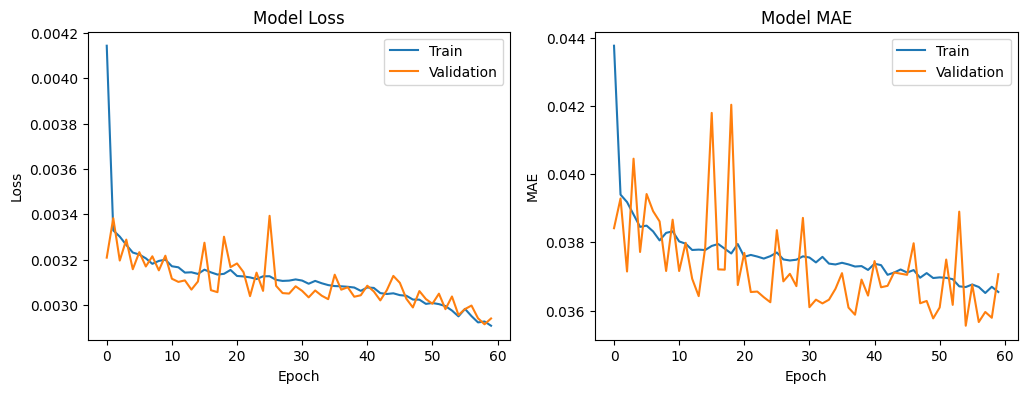

In [ ]:
plot_result(history6)

In [ ]:
pred6 = model6.predict(X_test_scaled)

163/163 [==============================] - 1s 2ms/step


In [ ]:
def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i))
  return np.array(temp_list)

In [ ]:
pred6_ori = scaling_inverse(pred6, scaler)
pred6_ori[0]

array([[76.388695],
       [77.931305],
       [76.26066 ],
       [77.84265 ],
       [76.8935  ],
       [77.595375],
       [76.56691 ],
       [76.96857 ],
       [76.781685],
       [78.204895]], dtype=float32)

In [ ]:
y_test_ori = scaling_inverse(y_test_scaled, scaler)
y_test_ori[0]

array([[72.5],
       [71.6],
       [72.1],
       [72.3],
       [71.5],
       [71.1],
       [72.5],
       [71.5],
       [70.5],
       [70.5]])

In [ ]:
mse(pred6_ori, y_test_ori)

<tf.Tensor: shape=(), dtype=float64, numpy=461.4680655530608>

In [ ]:
# model6.evaluate(X_test, y_test)

163/163 [==============================] - 1s 3ms/step - loss: 506.3069 - mae: 15.6212


[506.3069152832031, 15.621232032775879]

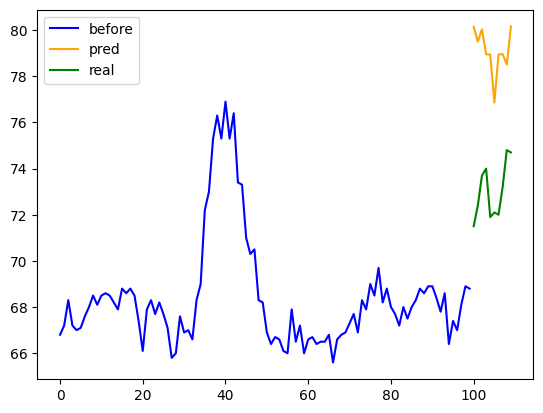

In [ ]:
left_num = 100

i = 713

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred6_ori[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test_ori[i], label='real', color='green')
plt.legend()

In [ ]:
model6.save('/content/drive/My Drive/ai_project/model/seq2seq_1-6.keras')

# Model 7 - GRU(unit 300) 1층, <30 to 10>

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [4]:
model7 = Sequential()
model7.add(Input(batch_shape=(None, n, 1)))
model7.add(GRU(300, return_sequences=True))
model7.add(TimeDistributed(Dense(1)))
model7.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model7.compile(loss='mse', optimizer='adam', metrics=['mae'])

model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 30, 300)           272700    
                                                                 
 time_distributed_1 (TimeDi  (None, 30, 1)             301       
 stributed)                                                      
                                                                 
 lambda_1 (Lambda)           (None, 10, 1)             0         
                                                                 
Total params: 273001 (1.04 MB)
Trainable params: 273001 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
history7 = model7.fit(X_train, y_train,
                      epochs=30,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/30
519/519 [==============================] - 19s 16ms/step - loss: 6115.2183 - mae: 56.9801 - val_loss: 2074.2366 - val_mae: 28.2495
Epoch 2/30
519/519 [==============================] - 5s 10ms/step - loss: 1313.9723 - mae: 22.5213 - val_loss: 853.6027 - val_mae: 19.0797
Epoch 3/30
519/519 [==============================] - 6s 11ms/step - loss: 740.8134 - mae: 17.5042 - val_loss: 626.2172 - val_mae: 16.6027
Epoch 4/30
519/519 [==============================] - 5s 10ms/step - loss: 606.0549 - mae: 16.2415 - val_loss: 556.2333 - val_mae: 16.1908
Epoch 5/30
519/519 [==============================] - 3s 6ms/step - loss: 574.2699 - mae: 15.9627 - val_loss: 570.6108 - val_mae: 15.8981
Epoch 6/30
519/519 [==============================] - 3s 6ms/step - loss: 554.7196 - mae: 15.7497 - val_loss: 549.0815 - val_mae: 15.6898
Epoch 7/30
519/519 [==============================] - 4s 7ms/step - loss: 552.3922 - mae: 15.7406 - val_loss: 528.6867 - val_mae: 15.3604
Epoch 8/30
519/519 [======

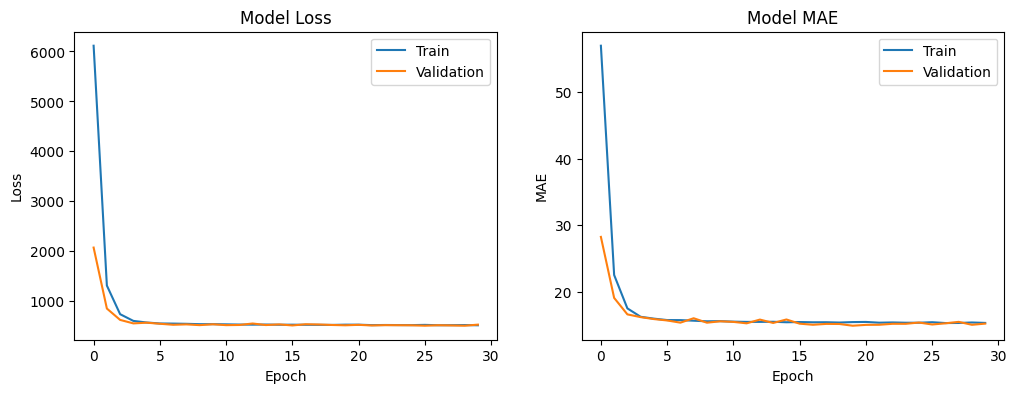

In [6]:
plot_result(history7)

In [7]:
pred7 = model7.predict(X_test)

163/163 [==============================] - 1s 2ms/step


In [8]:
model7.evaluate(X_test, y_test)

163/163 [==============================] - 1s 3ms/step - loss: 522.8894 - mae: 15.1605


[522.889404296875, 15.160470962524414]

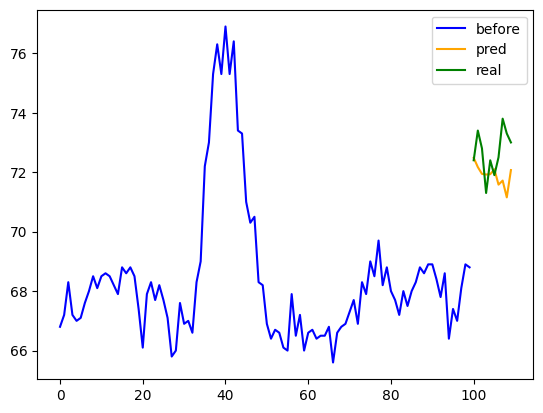

In [9]:
left_num = 100

i = 7

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred7[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [10]:
model7.save('/content/drive/My Drive/ai_project/model/seq2seq_1-7.keras')

# Model 8 - GRU(unit 500) 1층, <30 to 10>

In [13]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Input, TimeDistributed, Lambda

In [12]:
model8 = Sequential()
model8.add(Input(batch_shape=(None, n, 1)))
model8.add(GRU(500, return_sequences=True))
model8.add(TimeDistributed(Dense(1)))
model8.add(Lambda(lambda x: x[:, -10:], input_shape=(None, n, 1)))

model8.compile(loss='mse', optimizer='adam', metrics=['mae'])

model8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 30, 500)           754500    
                                                                 
 time_distributed_3 (TimeDi  (None, 30, 1)             501       
 stributed)                                                      
                                                                 
 lambda_3 (Lambda)           (None, 10, 1)             0         
                                                                 
Total params: 755001 (2.88 MB)
Trainable params: 755001 (2.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history8 = model8.fit(X_train, y_train,
                      epochs=30,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/30
519/519 [==============================] - 6s 7ms/step - loss: 4027.3552 - mae: 42.1723 - val_loss: 1018.9664 - val_mae: 20.2630
Epoch 2/30
519/519 [==============================] - 5s 9ms/step - loss: 772.7943 - mae: 17.9858 - val_loss: 645.9450 - val_mae: 17.1162
Epoch 3/30
519/519 [==============================] - 7s 13ms/step - loss: 600.6268 - mae: 16.3081 - val_loss: 563.6594 - val_mae: 16.0604
Epoch 4/30
519/519 [==============================] - 6s 11ms/step - loss: 574.8383 - mae: 16.0562 - val_loss: 598.6381 - val_mae: 15.8247
Epoch 5/30
519/519 [==============================] - 5s 10ms/step - loss: 568.0806 - mae: 15.9842 - val_loss: 547.1417 - val_mae: 15.4039
Epoch 6/30
519/519 [==============================] - 6s 11ms/step - loss: 556.3715 - mae: 15.8712 - val_loss: 536.7014 - val_mae: 15.9438
Epoch 7/30
519/519 [==============================] - 4s 8ms/step - loss: 552.0349 - mae: 15.8107 - val_loss: 553.4028 - val_mae: 16.0961
Epoch 8/30
519/519 [========

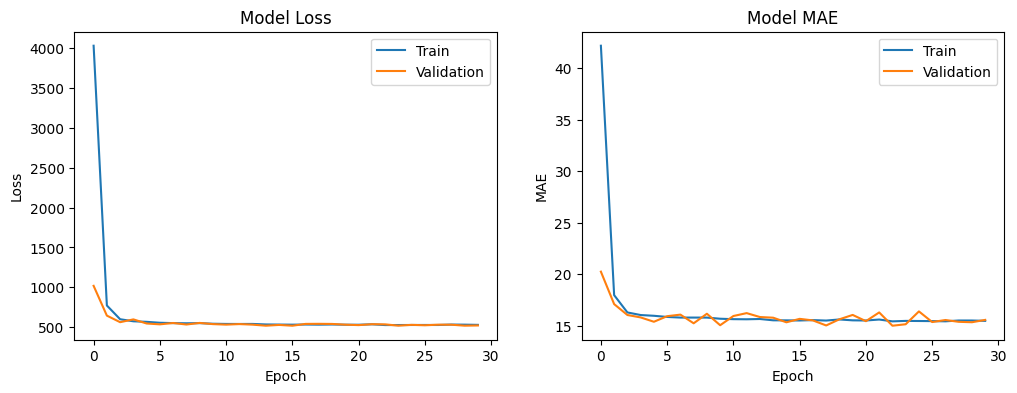

In [15]:
plot_result(history8)

In [16]:
pred8 = model8.predict(X_test)

163/163 [==============================] - 1s 4ms/step


In [17]:
model8.evaluate(X_test, y_test)

163/163 [==============================] - 1s 4ms/step - loss: 527.7609 - mae: 15.8331


[527.7609252929688, 15.833144187927246]

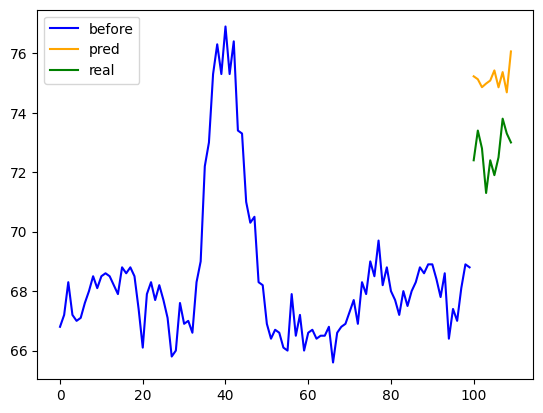

In [18]:
left_num = 100

i = 7

plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred8[i], label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test[i], label='real', color='green')
plt.legend()

In [19]:
model8.save('/content/drive/My Drive/ai_project/model/seq2seq_1-8.keras')

In [20]:
# GRU 200층으로 충분한 것 같다

# Model 9

# Model 10

# Model 11

# Model 12

# Model 13